# Day 15

In [1]:
from enum import Enum

Direction = Enum('Direction', 'U R D L')

class Point:
    def __init__(self, y, x, risk_factor):
        self.y = y
        self.x = x
        self.risk_factor = risk_factor
        self.direction = None
        self.neighbours_risk_factor = 0
    def __repr__(self):
        if self.direction:
            return f'{self.direction.name}{self.neighbours_risk_factor}'
        else:
            return str(self.risk_factor)
    def total_risk_factor(self):
        return self.risk_factor + self.neighbours_risk_factor
    
def chart(points):
    canvas = [
        [0] * len(points[0])
        for _ in range(len(points))
    ]
    for p in walk_path(points):
        canvas[p.y][p.x] = 1
    return canvas   
    
def get_val(y, x, arr):
    try:
        if (x < 0) or (y < 0):
            return None
        return arr[y][x]
    except Exception:
        return None
    
def fill_point(point, points):    
    dn = get_val(point.y+1, point.x, points)
    rn = get_val(point.y, point.x+1, points)
    if dn:
        if rn and (rn.total_risk_factor() < dn.total_risk_factor()):
            point.direction = Direction.R
            point.neighbours_risk_factor = rn.total_risk_factor()
        else:
            point.direction = Direction.D
            point.neighbours_risk_factor = dn.total_risk_factor()
    elif rn:
        point.direction = Direction.R        
        point.neighbours_risk_factor = rn.total_risk_factor()        
        
def fill_points(points):
    for line in points[::-1]:
        for point in line[::-1]:
            fill_point(point, points)
            
def walk_path(points):
    point = points[0][0]
    y, x = point.y, point.x
    while True:
        yield point
        if point.direction == Direction.U:
            y -= 1
        elif point.direction == Direction.D:
            y += 1
        elif point.direction == Direction.L:
            x -= 1
        elif point.direction == Direction.R:
            x += 1
        else:
            break        
        point = points[y][x]

with open('day15.txt', 'r') as f:
    lines = (line.strip() for line in f)
    points = [
        [Point(i, j, int(n)) for j, n in enumerate(line)]
        for i, line in enumerate(lines)
    ]      
point = points[1][2]
fill_points(points)
points[0][0].neighbours_risk_factor

366

In [2]:
def make_point(y, x, points, m, n):
    point = points[y % m][x % n]
    risk_factor = point.risk_factor + (y // m) + (x // n)
    if risk_factor >= 10:
        risk_factor -= 9
    return Point(y, x, risk_factor)
m, n = len(points), len(points[0])
new_points = [
    [make_point(y, x, points, m, n) for x in range(5*n)]
    for y in range(5*m)
]
fill_points(new_points)
print(new_points[0][0].neighbours_risk_factor)

2837


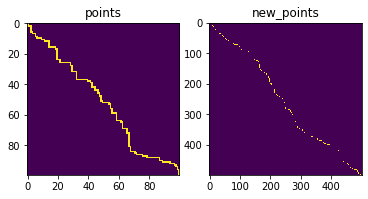

In [4]:
import matplotlib.pyplot as plt

_, (a, b) = plt.subplots(1, 2)
a.set_title('points')
b.set_title('new_points')
a.imshow(chart(points))
b.imshow(chart(new_points))
plt.show()

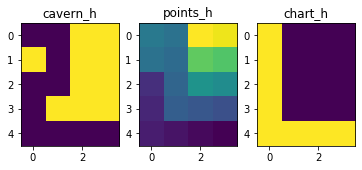

In [5]:
cavern_h = [
    [1, 1, 9, 9],
    [9, 1, 9, 9],
    [1, 1, 9, 9],
    [1, 9, 9, 9],
    [1, 1, 1, 1],
]
points_h = [
    [Point(i, j, n) for j, n in enumerate(row)]
    for i, row in enumerate(cavern_h)
]
fill_points(points_h)
_, (a, b, c) = plt.subplots(1, 3)
a.set_title('cavern_h')
b.set_title('points_h')
c.set_title('chart_h')
a.imshow(cavern_h)
b.imshow([
    [p.total_risk_factor() for p in row]
    for row in points_h
])
c.imshow(chart(points_h))
plt.show()

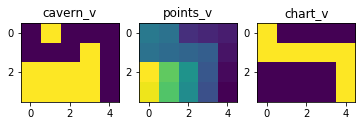

In [6]:
cavern_v = [
    [cavern_h[j][i] for j in range(len(cavern_h))]
    for i in range(len(cavern_h[0]))
]
points_v = [
    [Point(i, j, n) for j, n in enumerate(row)]
    for i, row in enumerate(cavern_v)
]
fill_points(points_v)
_, (a, b, c) = plt.subplots(1, 3)
a.set_title('cavern_v')
b.set_title('points_v')
c.set_title('chart_v')
a.imshow(cavern_v)
b.imshow([
    [p.total_risk_factor() for p in row]
    for row in points_v
])
c.imshow(chart(points_v))
plt.show()